In [1]:
"""
1. Make a simple bigram model
2. Do a mlp model
2. Do a wavenet model
3. Do a GPT model
"""
%load_ext autoreload
%autoreload 2

In [2]:
import torch
from torch import nn
from dataclasses import dataclass
import numpy as np
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch.nn.functional as F
import pandas as pd
from gpt.model import BiGram, MLP, WaveNet
from gpt.data import TextDataset
from gpt.wavenet_layers import make_wavenet
from gpt.utils import model_info, nan_hook
from torchinfo import summary
from gpt.transformer import Transformer

@torch.no_grad()
@torch.inference_mode()
def eval(device):
    losses = []
    for X, Y in iter(dl_val):
        X = X.to(device)
        Y = Y.to(device)
        y_logit, loss = model(X, Y)
        losses.append(loss.item())
    return torch.mean(torch.tensor(losses)).item()

In [8]:
# !wget https://raw.githubusercontent.com/karpathy/makemore/master/names.txt
# !wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
batch_size=64
block_size=256

In [9]:
ds_train = TextDataset('input.txt','train', block_size=block_size)
ds_val = TextDataset('input.txt','val', block_size=block_size)

dl_train = DataLoader(ds_train, batch_size=batch_size, shuffle=True)
dl_val = DataLoader(ds_val, batch_size=batch_size, shuffle=True)
vocab_size = len(ds_train.vocab)

In [10]:
c = Transformer.Config(block_size=block_size,
                       n_embd=384,
                       n_heads=6,
                       vocab_size=vocab_size,
                       n_blocks=6,
                       dropout=.2)
model = Transformer(c)
# model = MLP(vocab_size,block_size,n_embd, n_hidden)
# model = BiGram(vocab_size)
# _=summary(model, input_data=x,col_names=['input_size',"output_size", "num_params",'kernel_size'], verbose=2, row_settings=['var_names',], )

In [12]:
device = torch.device("cuda")
model = model.to(device)
# X,Y = next(iter(dl_train))
# X, Y = X.to(device),Y.to(device)
train_losses = []
val_losses = {}
step = 0

In [ ]:
optimizer = torch.optim.AdamW(model.parameters(), lr=3e-4)
max_epochs = 20
eval_freq = 50
done = False
for epoch in range(1, max_epochs+1):
    for i, (X,Y) in enumerate(iter(dl_train), start=1):
        step += 1
        # break
        X = X.to(device)
        Y = Y.to(device)
        y_logit,loss = model(X, Y)
        
        # break
        
        optimizer.zero_grad(True)
        loss.backward()
        optimizer.step()
        # scheduler.step()
    
        if step == 0 or step % eval_freq == 0:
            val_loss = eval(device)
            val_losses[step] = val_loss
            lr = optimizer.param_groups[0]['lr']
            print(f'{epoch}:{i}|s={step} loss: {loss.item()} val_loss: {val_loss} lr: {lr}')
            
        train_losses.append(float(loss))
                
    print('epoch done')

1:50|s=50 loss: 2.5307457447052 val_loss: 2.548118829727173 lr: 0.0003
1:100|s=100 loss: 2.477017402648926 val_loss: 2.495133399963379 lr: 0.0003
1:150|s=150 loss: 2.4505116939544678 val_loss: 2.467078685760498 lr: 0.0003
1:200|s=200 loss: 2.4043378829956055 val_loss: 2.4465432167053223 lr: 0.0003
1:250|s=250 loss: 2.341930389404297 val_loss: 2.3758797645568848 lr: 0.0003
1:300|s=300 loss: 2.2527260780334473 val_loss: 2.304080009460449 lr: 0.0003
1:350|s=350 loss: 2.1582577228546143 val_loss: 2.2166993618011475 lr: 0.0003
1:400|s=400 loss: 2.0934464931488037 val_loss: 2.1583914756774902 lr: 0.0003
1:450|s=450 loss: 2.0401923656463623 val_loss: 2.1005845069885254 lr: 0.0003
1:500|s=500 loss: 1.9590400457382202 val_loss: 2.0557265281677246 lr: 0.0003
1:550|s=550 loss: 1.9203728437423706 val_loss: 2.019498586654663 lr: 0.0003
1:600|s=600 loss: 1.8934191465377808 val_loss: 1.9841663837432861 lr: 0.0003
1:650|s=650 loss: 1.8212238550186157 val_loss: 1.94488525390625 lr: 0.0003
1:700|s=700 l

In [ ]:
# list(model.parameters())[0].var(0)

In [39]:
len(train_losses)

58830

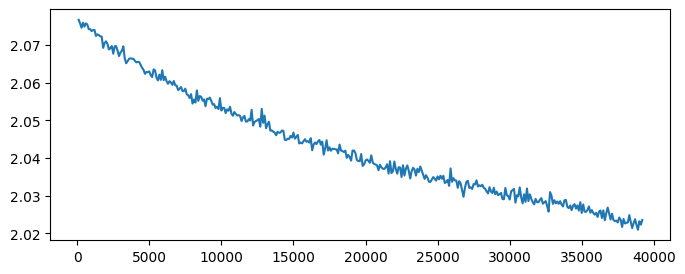

In [41]:
from scipy.signal import savgol_filter
train_losses_smoothed = savgol_filter(train_losses, 100, 1)
fig, ax = plt.subplots(1,1,figsize=(8,3))
i = list(range(0, len(train_losses), eval_freq))
# ax.plot(train_losses_smoothed)
ax.plot(val_losses.keys(),val_losses.values())
# ax.set_

In [42]:
x = ds_val[0][0].unsqueeze(0)
y_pred = model.predict(X, 1000)
print(''.join(ds_train.decode(y_pred[0])))

e fare to lase man wead plood balryson trainst,
Ever
hough to is see in two Edward did downtrever under-nesment of on udvertost is for that sord their, Tye fient-alout fable a digrenge him consune ouch a cake and glainly as yearte; and ofturmpled two your gest upe kind in is with but man, like obogbaltous some's good,
Where I'll of I prict mine younger may procks for pelliends my him, dears my bagain abrother rus greas theriend my thous ul itpray?

QUEEN YIOHN MARIA:
I wingly to Riction earn of aris plow rubval, dan, say should Hare?
Griviand blesss, by lord
There how
now for hose. Loiss and my do thee to you; what wall thy as contands.

JUTIUS:
O, by and my him'd I'll be conduty, I son in'
faull all that.
A Sern'd in I tervits, right:
To knawness Lord us ships commont: it fay, sire
And 'Tho gruse
Hen contase she act bust of wars ceater.

DUKE VINCE:

FRIAR A besuilingens, 'Best my be I well chard Chalome iless agaughter, lay his be flaines Was at the as panidiling in torm my mood, dra

torch.Size([1, 8, 65])